In [1]:
from ERGPY import *
from matplotlib import pyplot as plt
import pandas as pd

# Import CarMaker Parameters

In [24]:
ergpy = ERGPY()
quantities = ergpy.parse('C:\\Users\\ll_stsekeid\\Desktop\\Basti_Projekt\\app\\KML2CRO_104613.erg')

In [25]:
for q in quantities:
    print(q.name)

Car.Distance
Car.Road.GCS.Lat
Car.Road.GCS.Long
Time
Car.Road.GCS.Elev
Car.Road.Lane.Act.Width
Car.Road.Path.DevDist
$none$


In [26]:
CM_DLC = ergpy.getSingleQuantityValues('Car.Road.Path.DevDist')

In [37]:
dfcm = pd.DataFrame()
dfcm['cm_d2l'] = CM_DLC
dfcm['lat'] = ergpy.getSingleQuantityValues('Car.Road.GCS.Lat')
dfcm['lon'] = ergpy.getSingleQuantityValues('Car.Road.GCS.Long')


In [28]:
dfcm.index

RangeIndex(start=0, stop=1748, step=1)

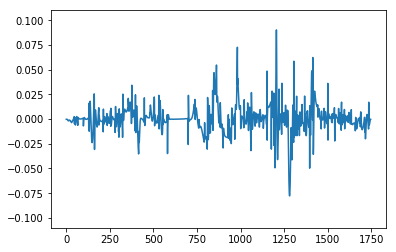

In [29]:
#Velocity 3.6 km/h & 1 Hz Frequenz
%matplotlib inline
plt.plot(dfcm.index,dfcm.cm_d2l)
plt.ylim(-0.11,0.11)
plt.show()

In [30]:
len(CM_DLC)

1748

# Import GT Parametes

In [31]:
df = pd.read_csv('A7P0GaussKrueger_20191215_v1-0_SK.csv',sep=',')
df.head()

,Unnamed: 0,d2l,lon,lat
0,0,-0.115950,10.303353,47.809265
1,1,-0.116035,10.303435,47.809193
2,2,-0.116089,10.303518,47.809121
3,3,-596878.714466,0.303604,47.809045
4,4,-0.116598,10.303696,47.808965


In [32]:
len(df.d2l)

#df['d2l'] = [df.d2l[i]*-1 for i in range(len(df))]
    

409

In [49]:
dfcm.lon.values[20:50]*180/np.pi


array([10.30333166, 10.30341234, 10.30349319, 10.30357742, 10.30366624,
       10.30375983, 10.30385839, 10.30396202, 10.30407008, 10.30418125,
       10.3042943 , 10.30440837, 10.30452294, 10.30463774, 10.30475252,
       10.30486668, 10.30498046, 10.30509423, 10.3052082 , 10.30532247,
       10.30543708, 10.30555201, 10.30566721, 10.30578265, 10.30589827,
       10.30601406, 10.30612983, 10.30624499, 10.30635998, 10.30647534])

In [48]:
df.lon.values[0:10]

array([10.30335299, 10.30343487, 10.3035175 ,  0.30360446, 10.30369584,
        0.30379238,  0.30389409, 10.30400133, 10.30411092, 10.30422382])

In [33]:
import numpy as np

#for i in range(len(df)):
    
#    if df.d2l[i] < -10:
        
#        df.d2l[i] = np.NaN
        
df['d2l'] = [df.d2l[i] if df.d2l[i] > -10 else np.NaN for i in range(len(df)) ]
df['d2l'] = [df.d2l[i]*-1 for i in range(len(df))]

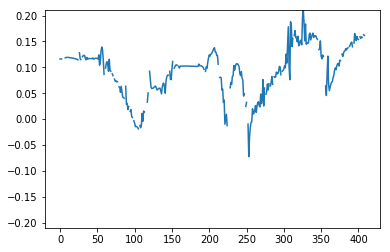

In [34]:
%matplotlib inline
plt.plot(df.index,df.d2l)
plt.ylim(-0.21,0.21)
plt.show()

In [42]:
# Ref Point CM correction

In [35]:
np.nanmean(df.d2l.values)

0.09318279918904282

In [36]:
np.nanstd(df.d2l.values)

0.047067555818532496

In [22]:
np.nanmean(df.d2l.values)

0.11106500728757907

In [23]:
np.nanstd(df.d2l.values)

0.014451275762238997